# Problem Statement
Seberapa akurat prediksi customer yang akan churn dengan semua variabel (numerik dan kategorikal) dikalkulasi dengan menggunakan 3 algoritma yang berbeda

# Business Objective
3 model untuk prediksi customer yang akan churn

# **Exploratory Data Analysis**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, classification_report
import pickle
from pathlib import Path
	
import warnings
warnings.filterwarnings('ignore')

In [2]:
df_load = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/dqlab_telco_final.csv')

In [3]:
df_load.head()

,UpdatedAt,customerID,gender,SeniorCitizen,Partner,tenure,PhoneService,StreamingTV,InternetService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
0,202006,45759018157,Female,No,Yes,1,No,No,Yes,Yes,29.85,29.85,No
1,202006,45315483266,Male,No,Yes,60,Yes,No,No,Yes,20.50,1198.80,No
2,202006,45236961615,Male,No,No,5,Yes,Yes,Yes,No,104.10,541.90,Yes
3,202006,45929827382,Female,No,Yes,72,Yes,Yes,Yes,Yes,115.50,8312.75,No
4,202006,45305082233,Female,No,Yes,56,Yes,Yes,Yes,No,81.25,4620.40,No


In [4]:
df_load.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6950 entries, 0 to 6949
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   UpdatedAt         6950 non-null   int64  
 1   customerID        6950 non-null   int64  
 2   gender            6950 non-null   object 
 3   SeniorCitizen     6950 non-null   object 
 4   Partner           6950 non-null   object 
 5   tenure            6950 non-null   int64  
 6   PhoneService      6950 non-null   object 
 7   StreamingTV       6950 non-null   object 
 8   InternetService   6950 non-null   object 
 9   PaperlessBilling  6950 non-null   object 
 10  MonthlyCharges    6950 non-null   float64
 11  TotalCharges      6950 non-null   float64
 12  Churn             6950 non-null   object 
dtypes: float64(2), int64(3), object(8)
memory usage: 706.0+ KB


In [5]:
df_load.isna().sum()

UpdatedAt           0
customerID          0
gender              0
SeniorCitizen       0
Partner             0
tenure              0
PhoneService        0
StreamingTV         0
InternetService     0
PaperlessBilling    0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [6]:
df_load.duplicated().sum()

0

### **Prosentase Churn**

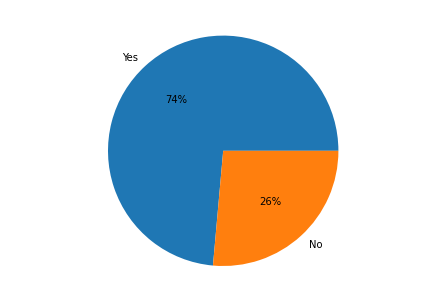

In [7]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
labels = ['Yes','No']
churn = df_load.Churn.value_counts()
ax.pie(churn, labels=labels, autopct='%.0f%%')
plt.show()

### **EDA Numeric Variables**

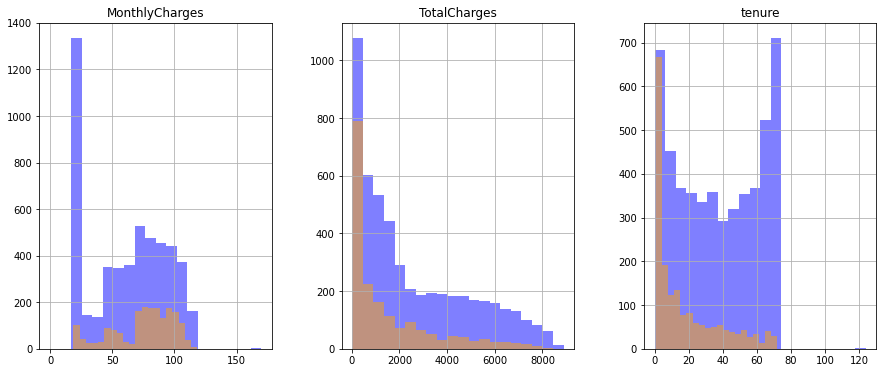

In [8]:
numerical_features =  ['MonthlyCharges','TotalCharges','tenure']
fig, ax = plt.subplots(1, 3, figsize=(15, 6))
# Use the following code to plot two overlays of histogram per each numerical_features, use a color of blue and orange, respectively
df_load[df_load.Churn == 'No'][numerical_features].hist(bins=20, color='blue', alpha=0.5, ax=ax)
df_load[df_load.Churn == 'Yes'][numerical_features].hist(bins=20, color='orange', alpha=0.5, ax=ax)
plt.show()

### **EDA Categorical Variables**

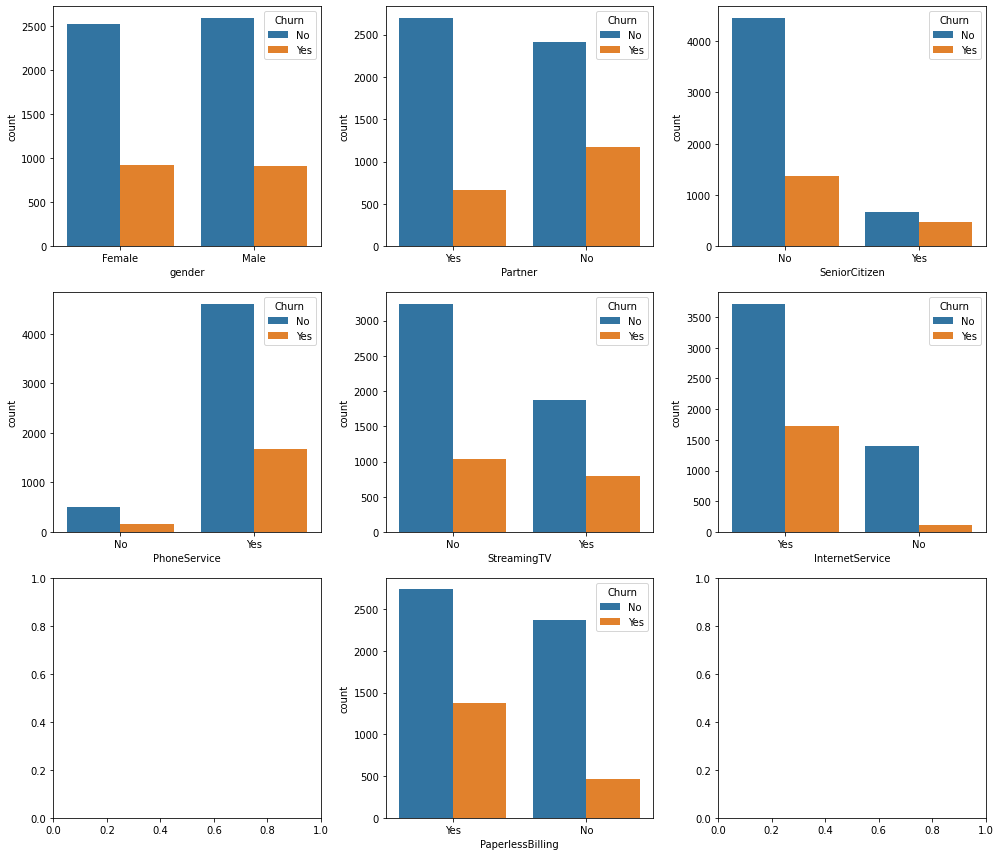

In [9]:
fig, ax = plt.subplots(3, 3, figsize=(14, 12))
sns.countplot(data=df_load, x='gender', hue='Churn', ax=ax[0][0])
sns.countplot(data=df_load, x='Partner', hue='Churn', ax=ax[0][1])
sns.countplot(data=df_load, x='SeniorCitizen', hue='Churn', ax=ax[0][2])
sns.countplot(data=df_load, x='PhoneService', hue='Churn', ax=ax[1][0])
sns.countplot(data=df_load, x='StreamingTV', hue='Churn', ax=ax[1][1])
sns.countplot(data=df_load, x='InternetService', hue='Churn', ax=ax[1][2])
sns.countplot(data=df_load, x='PaperlessBilling', hue='Churn', ax=ax[2][1])
plt.tight_layout()
plt.show()

# **Cleaning Data**

In [10]:
cleaned_df = df_load.drop(['customerID', 'UpdatedAt'],axis=1)
cleaned_df.head()

,gender,SeniorCitizen,Partner,tenure,PhoneService,StreamingTV,InternetService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,1,No,No,Yes,Yes,29.85,29.85,No
1,Male,No,Yes,60,Yes,No,No,Yes,20.50,1198.80,No
2,Male,No,No,5,Yes,Yes,Yes,No,104.10,541.90,Yes
3,Female,No,Yes,72,Yes,Yes,Yes,Yes,115.50,8312.75,No
4,Female,No,Yes,56,Yes,Yes,Yes,No,81.25,4620.40,No


# **Overview Data Correlation**

<AxesSubplot:>

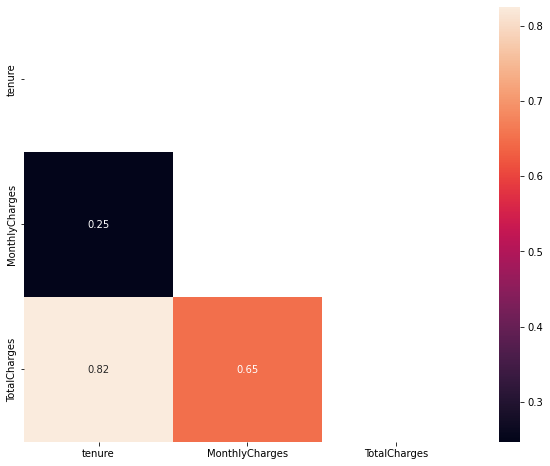

In [11]:
mask = np.triu(np.ones_like(cleaned_df.corr(), dtype=np.bool))

# Create heatmap
plt.figure(figsize=(10,8))
sns.heatmap(cleaned_df.corr(), annot=True, mask=mask)

### **Encoding Data**

In [12]:
#Convert all the non-numeric columns to numerical data types
for column in cleaned_df.columns:
    if cleaned_df[column].dtype == np.number: continue
    # Perform encoding for each non-numeric column
    cleaned_df[column] = LabelEncoder().fit_transform(cleaned_df[column])
cleaned_df.describe()

,gender,SeniorCitizen,Partner,tenure,PhoneService,StreamingTV,InternetService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
count,6950.000000,6950.000000,6950.000000,6950.000000,6950.000000,6950.000000,6950.000000,6950.000000,6950.000000,6950.000000,6950.000000
mean,0.504317,0.162302,0.483309,32.415827,0.903741,0.384317,0.783453,0.591942,64.992201,2286.058750,0.264173
std,0.500017,0.368754,0.499757,24.561336,0.294967,0.486468,0.411921,0.491509,30.032040,2265.702553,0.440923
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,19.000000,0.000000
25%,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,1.000000,0.000000,36.462500,406.975000,0.000000
50%,1.000000,0.000000,0.000000,29.000000,1.000000,0.000000,1.000000,1.000000,70.450000,1400.850000,0.000000
75%,1.000000,0.000000,1.000000,55.000000,1.000000,1.000000,1.000000,1.000000,89.850000,3799.837500,1.000000
max,1.000000,1.000000,1.000000,73.000000,1.000000,1.000000,1.000000,1.000000,169.931250,8889.131250,1.000000


### **Splitting Dataset**

In [13]:
from sklearn.model_selection import train_test_split
# Predictor dan target
X = cleaned_df.drop('Churn', axis = 1) 
y = cleaned_df['Churn']
# Splitting train and test
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
# Print according to the expected result
print('Jumlah baris dan kolom dari x_train adalah:', x_train.shape,', sedangkan Jumlah baris dan kolom dari y_train adalah:', y_train.shape)
print('Prosentase Churn di data Training adalah:')
print(y_train.value_counts(normalize=True))
print('Jumlah baris dan kolom dari x_test adalah:', x_test.shape,', sedangkan Jumlah baris dan kolom dari y_test adalah:', y_test.shape)
print('Prosentase Churn di data Testing adalah:')
print(y_test.value_counts(normalize=True))

Jumlah baris dan kolom dari x_train adalah: (5560, 10) , sedangkan Jumlah baris dan kolom dari y_train adalah: (5560,)
Prosentase Churn di data Training adalah:
0    0.735072
1    0.264928
Name: Churn, dtype: float64
Jumlah baris dan kolom dari x_test adalah: (1390, 10) , sedangkan Jumlah baris dan kolom dari y_test adalah: (1390,)
Prosentase Churn di data Testing adalah:
0    0.738849
1    0.261151
Name: Churn, dtype: float64


# **Building Model 1: Logistic Regression**

In [14]:
# Call the classifier
logreg = LogisticRegression()
# Fit the classifier to the training data  
logreg = logreg.fit(x_train,y_train)
#Training Model: Predict 
y_pred = logreg.predict(x_test)

#Evaluate Model Performance
print('Training Accuracy :', logreg.score(x_train, y_train))  
print('Testing Accuracy :', logreg.score(x_test, y_test))  

# confusion matrix
print('\nConfusion matrix')  
cm = confusion_matrix(y_test, y_pred)  
print(cm)

# classification report  
print('\nClassification report')  
cr = classification_report(y_test, y_pred)  
print(cr)

Training Accuracy : 0.7908273381294963
Testing Accuracy : 0.8151079136690648

Confusion matrix
[[951  76]
 [181 182]]

Classification report
              precision    recall  f1-score   support

           0       0.84      0.93      0.88      1027
           1       0.71      0.50      0.59       363

    accuracy                           0.82      1390
   macro avg       0.77      0.71      0.73      1390
weighted avg       0.80      0.82      0.80      1390



In [15]:
df_test_set = x_test
df_test_set = df_test_set.join(y_test)
df_test_set['CHURN PREDICTIONS'] = y_pred
df_test_set.sample(5)

,gender,SeniorCitizen,Partner,tenure,PhoneService,StreamingTV,InternetService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,CHURN PREDICTIONS
4900,1,0,1,62,1,0,1,0,71.40,4487.30,0,0
6164,1,1,0,21,1,1,1,1,96.80,2030.30,1,1
5177,0,1,1,65,1,1,1,0,105.25,6786.40,1,0
643,0,0,0,31,1,0,1,1,76.05,2227.80,0,0
506,1,0,1,46,1,0,1,0,65.65,3047.15,0,0


# **Building Model 2: Random Forest Classifier**

In [16]:
# Call the classifier
rdf_model = RandomForestClassifier()
# Fit the classifier to the training data  
rdf_model = rdf_model.fit(x_train,y_train)
#Training Model: Predict 
y_pred = rdf_model.predict(x_test)

#Evaluate Model Performance
print('Training Accuracy :', rdf_model.score(x_train, y_train))  
print('Testing Accuracy :', rdf_model.score(x_test, y_test))  

# confusion matrix
print('\nConfusion matrix')  
cm = confusion_matrix(y_test, y_pred)  
print(cm)

# classification report  
print('\nClassification report')  
cr = classification_report(y_test, y_pred)  
print(cr)

Training Accuracy : 0.9951438848920864
Testing Accuracy : 0.7827338129496403

Confusion matrix
[[910 117]
 [185 178]]

Classification report
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1027
           1       0.60      0.49      0.54       363

    accuracy                           0.78      1390
   macro avg       0.72      0.69      0.70      1390
weighted avg       0.77      0.78      0.77      1390



In [17]:
df_test_set = x_test
df_test_set = df_test_set.join(y_test)
df_test_set['CHURN PREDICTIONS'] = y_pred
df_test_set.sample(5)

,gender,SeniorCitizen,Partner,tenure,PhoneService,StreamingTV,InternetService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,CHURN PREDICTIONS
765,0,0,0,7,0,0,1,0,29.80,201.95,0,0
147,1,0,0,16,1,0,1,1,80.55,1248.90,0,0
2895,1,0,0,62,1,0,0,0,20.00,1250.10,0,0
1594,0,0,0,2,1,0,1,1,54.35,117.05,0,1
3856,0,0,0,18,1,0,1,1,90.10,1612.75,1,0


# **Building Model 3: Gradient Boosting Classifier**

In [18]:
# Call the classifier
gbt_model = GradientBoostingClassifier()
# Fit the classifier to the training data  
gbt_model = gbt_model.fit(x_train,y_train)
#Training Model: Predict 
y_pred = gbt_model.predict(x_test)

#Evaluate Model Performance
print('Training Accuracy :', gbt_model.score(x_train, y_train))  
print('Testing Accuracy :', gbt_model.score(x_test, y_test))  

# confusion matrix
print('\nConfusion matrix')  
cm = confusion_matrix(y_test, y_pred)  
print(cm)

# classification report  
print('\nClassification report')  
cr = classification_report(y_test, y_pred)  
print(cr)

Training Accuracy : 0.8131294964028777
Testing Accuracy : 0.8014388489208633

Confusion matrix
[[936  91]
 [185 178]]

Classification report
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1027
           1       0.66      0.49      0.56       363

    accuracy                           0.80      1390
   macro avg       0.75      0.70      0.72      1390
weighted avg       0.79      0.80      0.79      1390



In [19]:
df_test_set = x_test
df_test_set = df_test_set.join(y_test)
df_test_set['CHURN PREDICTIONS'] = y_pred
df_test_set.sample(5)

,gender,SeniorCitizen,Partner,tenure,PhoneService,StreamingTV,InternetService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,CHURN PREDICTIONS
2728,0,1,1,28,1,0,0,0,25.70,734.60,0,0
2657,1,0,1,22,1,0,0,0,20.25,488.25,0,0
3061,0,0,1,59,1,1,1,0,101.10,6039.90,1,0
4070,0,0,0,29,1,1,1,1,78.90,2384.15,1,0
6129,0,0,0,1,1,0,0,1,20.15,20.15,1,1


# **Choosing The Best Model**

Summary:


*   Logistic Regression: Akurasi training 79% dan akurasi testing 79%
*   Random Forest: Akurasi training 99% dan akurasi testing 79%
*   Gradiant Boost: Akurasi training 81% dan akurasi testing 80%






Berdasarkan pemodelan yang telah dilakukan dengan menggunakan 3 model (Logistic Regression, Random Forest dan Gradiant Boost) maka dapat disimpulkan untuk memprediksi churn dari pelanggan telco dengan menggunakan dataset ini model terbaiknya adalah menggunakan algortima **Logistic Regression**, karena akurasi training sama baiknya dengan akurasi testing.



